In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = input("Enter the name of your train file: ")
f_in= open(f, "r")

Enter the name of your train file: P3train.txt


In [3]:
s = f_in.readline()
d = s.split("\t")
rows = int(d[0])
columns = int(d[1])+1

In [5]:
data = np.zeros([rows, columns])

In [6]:
for k in range(rows):
    s = f_in.readline()
    t = s.split("\t")
    #t[-1]=t[-1].strip()    
    for j in range(columns):
        data[k,j]= float(t[j])
    #print(data[k,j])
#print(data[k])

In [7]:
f_in.close()

In [8]:
f_out = open('P3train1.txt', "w")

In [9]:
#for loop to increase the number of features
thePower = 2
for a in range(rows):
    x1=data[a][0]
    x2=data[a][1]
    y=data[a][2]
    for j in range(thePower+1):
        for i in range(thePower+1):
            temp = (x1**i)*(x2**j)
            if (temp != 1):
                f_out.write(str(temp)+"\t")
    f_out.write(str(y)+"\n")
f_out.close()

In [10]:
f_in= open('P3train1.txt', "r")
s = f_in.readline()
d=s.split("\t")
columns = columns+6
data1 = np.zeros([rows, columns])

In [11]:
#print(columns)
#print(data1.shape)

In [12]:
'''for k in range(rows):
    s = f_in.readline()
    #t = s.split("\t")
    t = list(map(float,s.split('\t')))
    #t[-1]=t[-1].strip()    
    for j in range(columns):
        data1[k,j]= float(t[j])
    #print(data[k,j])
#print(data[k])'''

for k in range(rows-1):
    s = f_in.readline()
    t = s.split("\t")
    #t[-1]=t[-1].strip()    
    for j in range(columns):
        data1[k,j]= float(t[j])
        #print("k =", k)
        #print("J =", j)
    #print(data[k,j])
#print(data[k])

data1[84,0] = -0.0063364
data1[84,1] = 4.014996496e-05
data1[84,2] = 0.99927
data1[84,3] = -0.006331774428
data1[84,4] = 4.0120655485579195e-05
data1[84,5] = 0.9985405329
data1[84,6] = -0.00632715223266756
data1[84,7] = 4.009136740707473e-05
data1[84,8] = 0.0

print(data1.shape)

(85, 9)


In [13]:
f_in.close()

In [45]:
df = pd.DataFrame(data1, columns =['x1','x2','x3','x4','x5','x6','x7','x8','y'])
#print(df)
TX = df.iloc[:,:8]
TY = df.iloc[:,8:]

In [15]:
X_train = TX.values
Y_train = TY.values
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1]) 

In [18]:
file = input("Enter the name of your test file: ")
f_in= open(file, "r")

Enter the name of your test file: P3test.txt


In [19]:
s = f_in.readline()
d = s.split("\t")
rows = int(d[0])
columns = int(d[1])+1

In [20]:
data = np.zeros([rows, columns])

In [21]:
for k in range(rows):
    s = f_in.readline()
    t = s.split("\t")
    t[-1]=t[-1].strip()
        
    for j in range(columns):
        data[k,j]= float(t[j])

In [22]:
f_in.close()

In [23]:
f_out = open('P3test1.txt', "w")

In [24]:
#for loop to increase the number of features
thePower = 2 
for a in range(rows):
    x1=data[a][0]
    x2=data[a][1]
    y=data[a][2]
    for j in range(thePower+1):
        for i in range(thePower+1):
            temp = (x1**i)*(x2**j)
            if (temp != 1):
                f_out.write(str(temp)+"\t")
    f_out.write(str(y)+"\n")
f_out.close()

In [25]:
f_in= open('P3test1.txt', "r")

In [26]:
s = f_in.readline()
d = s.split("\t")
columns = columns+6
data2= np.zeros([rows, columns])

In [27]:
for k in range(rows-1):
    s2 = f_in.readline()
    t1 = s2.split("\t")
    t1[-1]=t1[-1].strip()
    #print(t1)       
    for j in range(columns):
        data2[k,j] = float(t1[j])
        
#print(data2)
#print(data2.shape)

In [28]:
f_in.close()

In [29]:
dt = pd.DataFrame(data2, columns =['x1','x2','x3','x4','x5','x6','x7','x8','y'])
#print(dt)
X= dt.iloc[:,:8]
Y= dt.iloc[:,8:]

In [30]:
X_test = X.values
Y_test = Y.values
X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [31]:
print("Shape of X_train is ",X_train.shape)
print("Shape of Y_train is ",Y_train.shape)
print("Shape of X_test is ",X_test.shape)
print("Shape of Y_test is ",Y_test.shape)

Shape of X_train is  (8, 85)
Shape of Y_train is  (1, 85)
Shape of X_test is  (8, 33)
Shape of Y_test is  (1, 33)


In [32]:
def sigmoid_fn(x):
    return 1/(1 + np.exp(-x))

In [33]:
def log_model(X, Y, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid_fn(Z)
        
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after",i, "iteration is : ",cost)
    return W, B, cost_list

In [34]:
iteration = 25000
alpha =  0.15
W, B, cost_list = log_model(X_train, Y_train, alpha, iteration)

cost after 0 iteration is :  0.6931471805599454
cost after 2500 iteration is :  0.3950999884286309
cost after 5000 iteration is :  0.36477706446421865
cost after 7500 iteration is :  0.3551674305823984
cost after 10000 iteration is :  0.3509163258575192
cost after 12500 iteration is :  0.34867706401580817
cost after 15000 iteration is :  0.3473617385136028
cost after 17500 iteration is :  0.3465306592189422
cost after 20000 iteration is :  0.34597831253648814
cost after 22500 iteration is :  0.3455977501614133


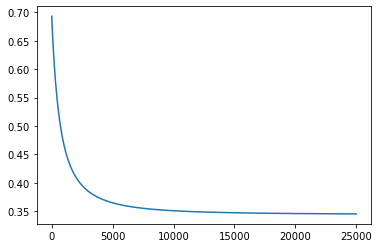

In [35]:
plt.plot(np.arange(iteration),cost_list)

In [36]:
print(W)
Z = np.dot(W.T, X_test) + B
A = sigmoid_fn(Z)
m = X_test.shape[1]
n = X_test.shape[0]

[[  2.07834063]
 [-10.73567469]
 [  3.7435557 ]
 [ -8.32357438]
 [ -0.99468771]
 [-10.17715364]
 [  3.01604057]
 [ -2.00994744]]


In [37]:
cost = -(1/m)*np.sum( Y_test*np.log(A) + (1-Y_test)*np.log(1-A))
print('J value is ',cost)

J value is  0.48146643176337556


In [38]:
A = A > 0.5
A = np.array(A, dtype = 'int64')
A = A.T
Y_test=Y_test.T

In [39]:
#for loop to calculate the values of TN,TP,FN,FP
TP=TN=FP=FN=0
for i in range(rows):
    if(Y_test[i]==0 and A[i]==1):
        FP+=1
    if(Y_test[i]==1 and A[i]==0):
        FN+=1
    if(Y_test[i]==1 and A[i]==1):
        TP+=1
    if(Y_test[i]==0 and A[i]==0):
        TN+=1

In [43]:
print('\nTest Data:\n')
print("Confusion Matrix:")
print('FP=%d FN=%d TP=%d TN=%d'%(FP, FN, TP, TN))
accuracy=((TP+TN)/(TP+TN+FP+FN))*100
precision=(TP/(TP+FP))*100
recall=(TP/(TP+FN))*100
f1=2*(1/((1/precision)+(1/recall)))
print('Accuracy for test set = %d percent' %accuracy)
print('Precision for test set = %d percent' %precision)
print('Recall for test set = %d percent' %recall)
print('F1 for test set = %d percent' %f1)
#print('Expected class ',Y_test[i],' Predicted class ', A[i])


Test Data:

Confusion Matrix:
FP=3 FN=1 TP=15 TN=14
Accuracy for test set = 87 percent
Precision for test set = 83 percent
Recall for test set = 93 percent
F1 for test set = 88 percent
